# What is a Cheshire Cat/Faceless Cat?

A "cheshire cat" is our name for a star that is *very* red, which has whiskers without a bleed column. Normally, to have whiskers, the star must be bright. Bright stars have enough red flux to cause **whiskers**. However, these bright stars also have bleed columns.

Cheshire cats are much brighter in the red than they are in the optical, making them have long, bright whiskers with no bleed columns.

Below are some examples of cheshire/faceless cats!

[V\* ET Eri](http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=V*+ET+Eri&submit=SIMBAD+search) is a a bright AGB star that has G mag 9, K mag 3.

In [222]:
tpf = lk.search_tesscut('V* W Cet').download(cutout_size=50)

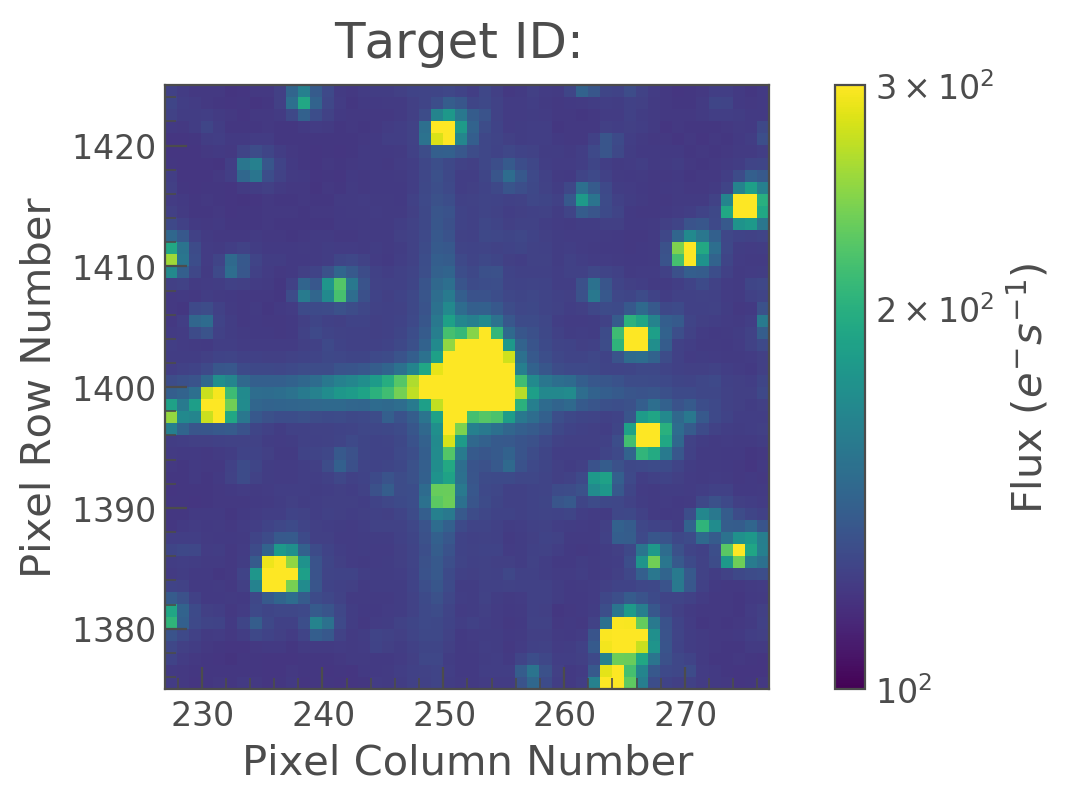

In [223]:
tpf.plot(scale='log', vmin=1e2, vmax=3e2)

In [224]:
from astropy.stats import sigma_clipped_stats
from astropy.convolution import convolve, Box2DKernel
import numpy as np
import matplotlib.pyplot as plt

In [225]:
thumb = np.nanpercentile(tpf.flux, 95, axis=(0))
mean, med, sd = sigma_clipped_stats(thumb, mask=thumb > 1e3)
bkg_aper = thumb < med
bkg = np.median(tpf.flux[:, bkg_aper], axis=1)
flux = tpf.flux - np.atleast_3d(bkg).transpose([1, 0, 2])
flux -= np.min(flux)

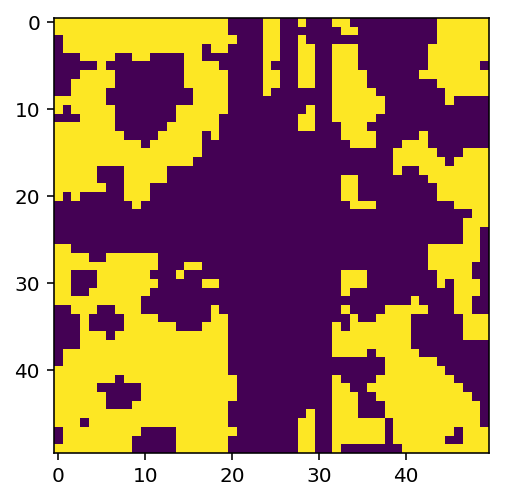

In [226]:
plt.imshow(bkg_aper)

In [282]:
x, y = np.meshgrid(np.arange(tpf.flux.shape[1], dtype=float), np.arange(tpf.flux.shape[2], dtype=float))
x -= np.median(x)
y -= np.median(y)
mask = (x**2 +y**2)**0.5 < 15
aper = convolve((np.median(flux, axis=0) > 1000) & mask, Box2DKernel(4)) > 1e-5

In [283]:
cross = (np.abs(x) < 4) | (np.abs(y) < 4)
whisker = ((np.median(flux, axis=0)) > 20) & mask & cross & ~aper

Text(0.5,1,'Whisker')

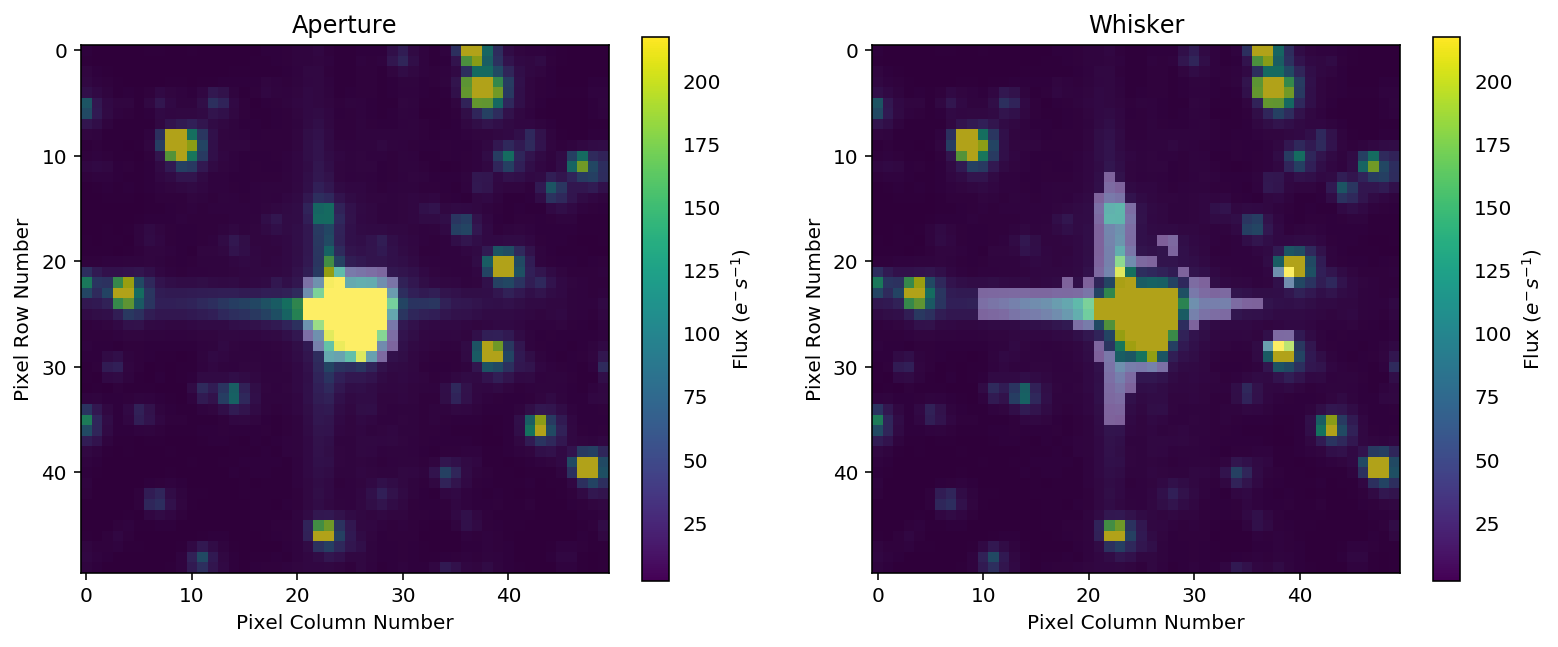

In [284]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

axs[0] = lk.utils.plot_image(flux[0], ax=axs[0])
axs[0].imshow(aper, cmap='Greys_r', alpha=0.3)
axs[0].set_title('Aperture')
axs[1] = lk.utils.plot_image(flux[0], ax=axs[1])
axs[1].imshow(whisker, cmap='Greys_r', alpha=0.3)
axs[1].set_title('Whisker')

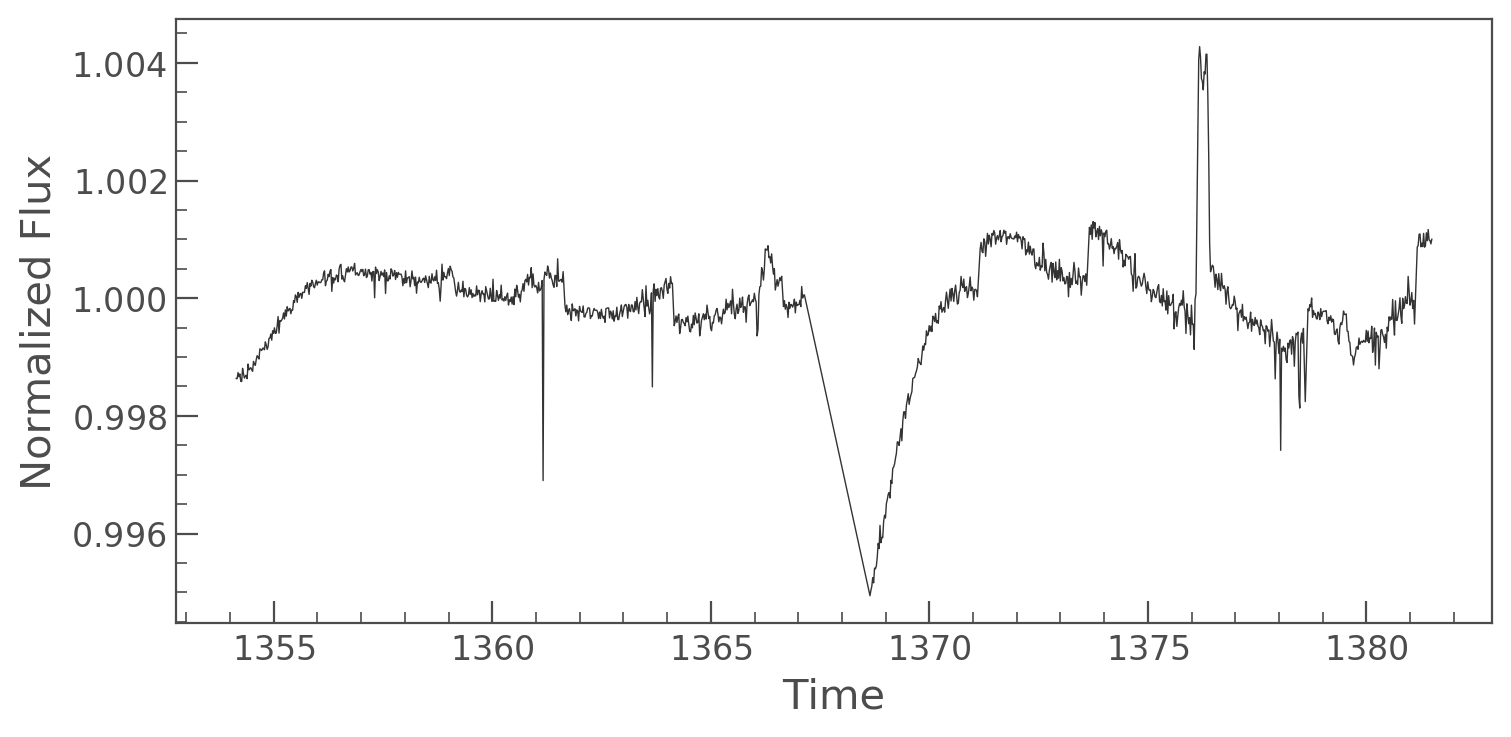

In [290]:
lc = lk.LightCurve(tpf.time, np.mean(flux[:, aper], axis=(1)))
line = np.polyval(np.polyfit(lc.time, lc.flux, 3), lc.time)
lc /= line
lc.plot()

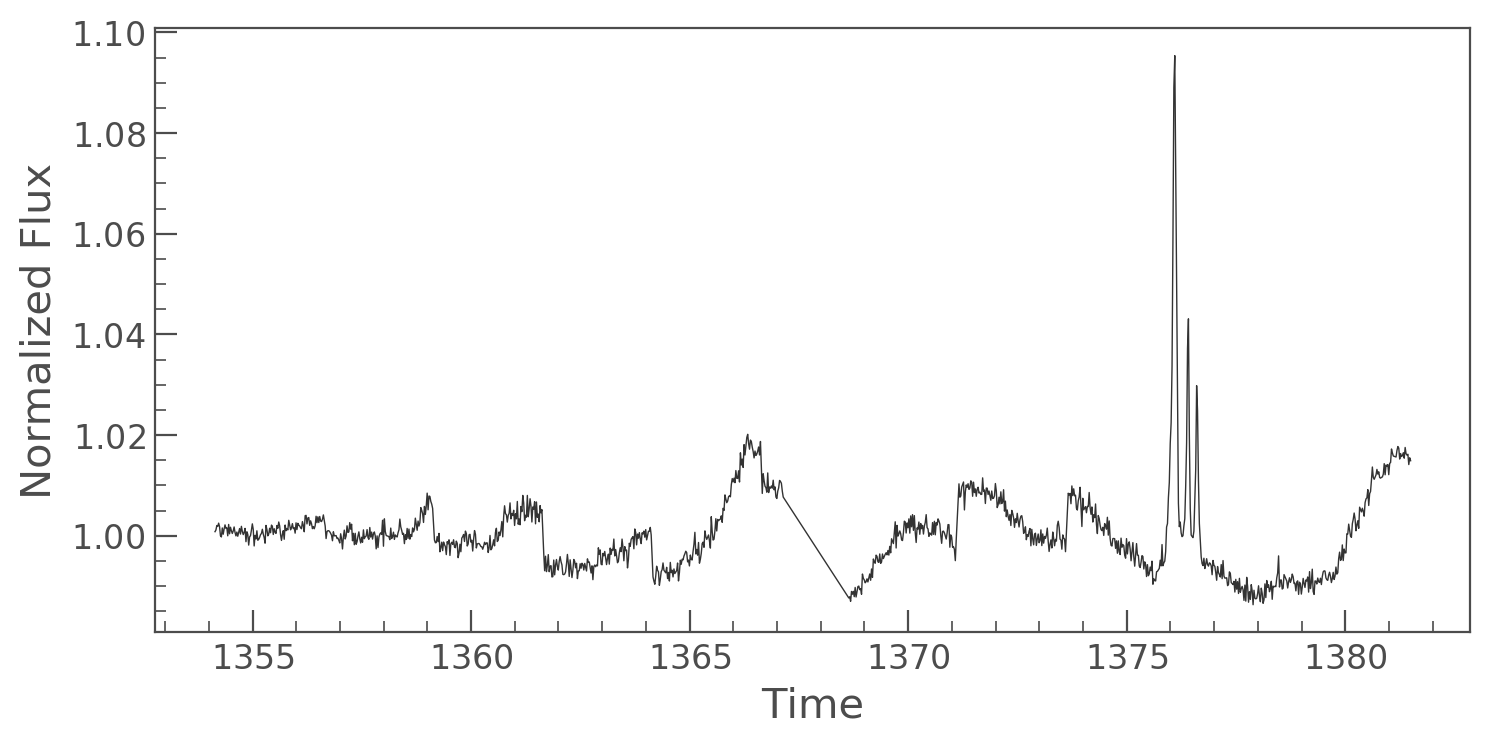

In [291]:
wlc = lk.LightCurve(tpf.time, np.mean(flux[:, whisker], axis=(1)))
line = np.polyval(np.polyfit(wlc.time, wlc.flux, 3), wlc.time)
wlc /= line
wlc.plot()

In [44]:
#tpf = lk.search_tesscut('V* W Cet').download(cutout_size=50)

In [45]:
#tpf.plot(scale='log', vmin=1e2, vmax=3e2)